<a href="https://colab.research.google.com/github/pbeles/project-3-nlp/blob/master/SVM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


SVM Classifier: Train Accuracy = 99.94% | Test Accuracy = 94.32%


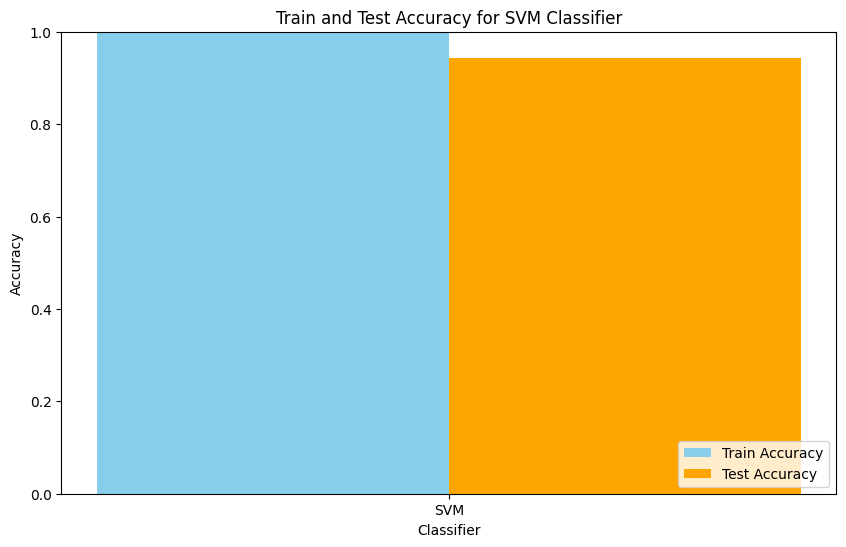

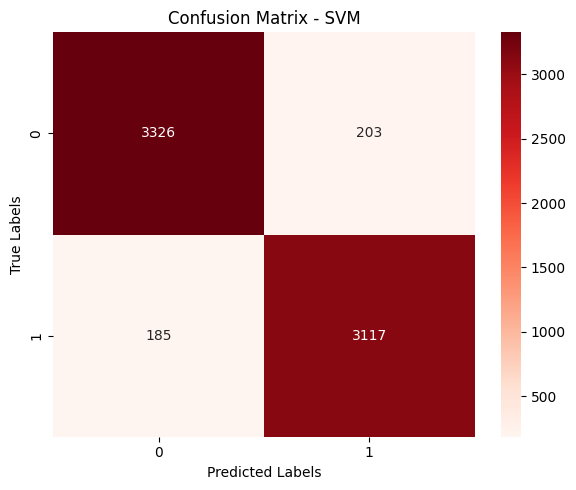

Last 50 Predictions for SVM Classifier:
[1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 1 0 0 0 1]


In [3]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve
import numpy as np

# Load dataset
file_path = '/content/training_data_lowercase.csv'
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['label', 'text'])

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Data Preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove single characters
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Define stopwords using NLTK
def define_stopwords():
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    return set(stopwords.words('english'))

stop_words = define_stopwords()

# Remove stopwords function
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Lemmatize text (placeholder function)
def lemmatize_text(text):
    return ' '.join([word for word in text.split()])  # This will keep the words unchanged

# Apply preprocessing, stopword removal, and lemmatization
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

train_data['processed_text'] = train_data['processed_text'].apply(remove_stopwords)
test_data['processed_text'] = test_data['processed_text'].apply(remove_stopwords)

train_data['processed_text'] = train_data['processed_text'].apply(lemmatize_text)
test_data['processed_text'] = test_data['processed_text'].apply(lemmatize_text)

# Feature Representation - TF-IDF Vectorizer with n-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text'])

# Train the SVM classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_tfidf, train_data['label'])

# Predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Accuracy Scores
svm_train_accuracy = svm_classifier.score(X_train_tfidf, train_data['label'])
svm_test_accuracy = accuracy_score(test_data['label'], y_pred_svm)

# Print accuracy percentages for SVM classifier
print("SVM Classifier: Train Accuracy = {:.2f}% | Test Accuracy = {:.2f}%".format(svm_train_accuracy * 100, svm_test_accuracy * 100))

# Combined Bar Plot for Train and Test Accuracy
plt.figure(figsize=(10, 6))
indices = np.arange(1)
width = 0.3

train_accuracies = [svm_train_accuracy]
test_accuracies = [svm_test_accuracy]
classifiers = ['SVM']

plt.bar(indices - width/2, train_accuracies, width, color='skyblue', label='Train Accuracy')
plt.bar(indices + width/2, test_accuracies, width, color='orange', label='Test Accuracy')

plt.ylim(0, 1)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for SVM Classifier')
plt.xticks(indices, classifiers)
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(test_data['label'], y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Print the last 50 predictions for SVM Classifier
print("Last 50 Predictions for SVM Classifier:")
print(y_pred_svm[-50:])
